In [74]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
cars = pd.read_csv('data_clean.csv')
cars.drop(['Name'], axis = 1, inplace=True)
cars.head()


,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity,Trademark,ProductionYear
0,Lắp ráp trong nước,SUV,0,Trắng,Kem,5,5,Số tự động,2049,Hà Nội,mới,Xăng,2.0,Mercedes,2022
1,Nhập khẩu,SUV,0,Trắng,Màu khác,5,7,Số tự động,1989,Hà Nội,mới,Xăng,1.3,Mercedes,2022
2,Lắp ráp trong nước,SUV,0,Xanh,Đen,5,7,Số tự động,1083,Hà Nội,mới,Xăng,1.5,Honda,2022
3,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5,5,Số tự động,925,Hà Nội,mới,Xăng,2.0,Hyundai,2022
4,Lắp ráp trong nước,Sedan,0,Đen,Đen,4,5,Số tự động,2879,Hà Nội,cũ,Xăng,2.0,Mercedes,2021


In [76]:
cars.shape

(1950, 15)

In [77]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Assemble        1950 non-null   object 
 1   Type            1950 non-null   object 
 2   Km              1950 non-null   int64  
 3   CarColor        1950 non-null   object 
 4   InteriorColor   1950 non-null   object 
 5   CarDoor         1950 non-null   int64  
 6   CarSeat         1950 non-null   int64  
 7   Gearbox         1950 non-null   object 
 8   Price           1950 non-null   int64  
 9   Location        1950 non-null   object 
 10  Status          1950 non-null   object 
 11  EngineCar       1950 non-null   object 
 12  Capacity        1950 non-null   float64
 13  Trademark       1950 non-null   object 
 14  ProductionYear  1950 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 228.6+ KB


# Visualing data 


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


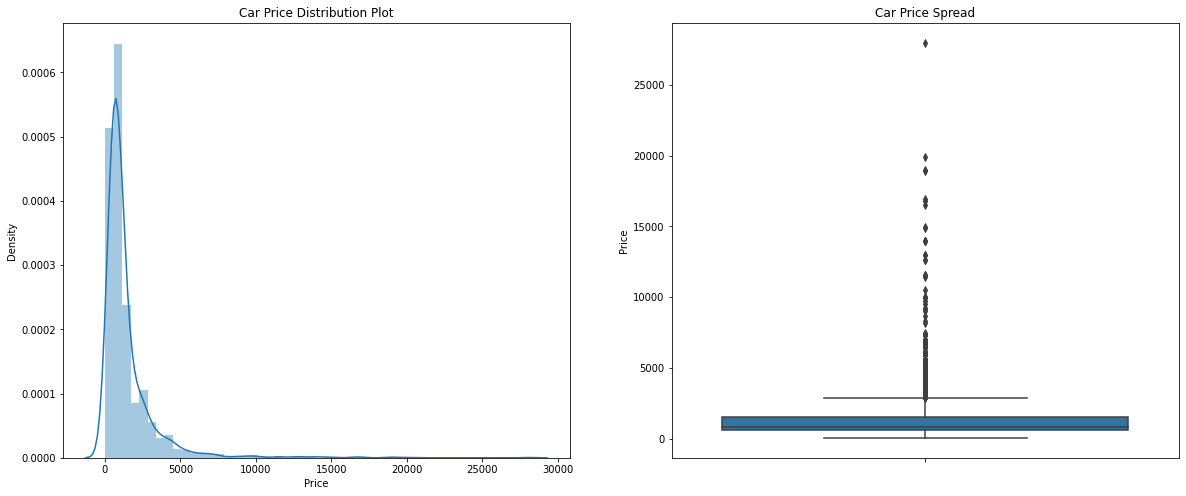

In [78]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

Giá hầu như bị lệch phải, giá toàn bộ xe oto có trong dataset đều dưới 5 tỷ đồng.

Giá trị outlie khá nhiều, nhưng đó là quan trọng.

Các Categorical Data:
---
- Asssemble
- Type
- CarColor
- InteriorColor
- GearBox
- Location
- Status
- EngineCar
- Trademark

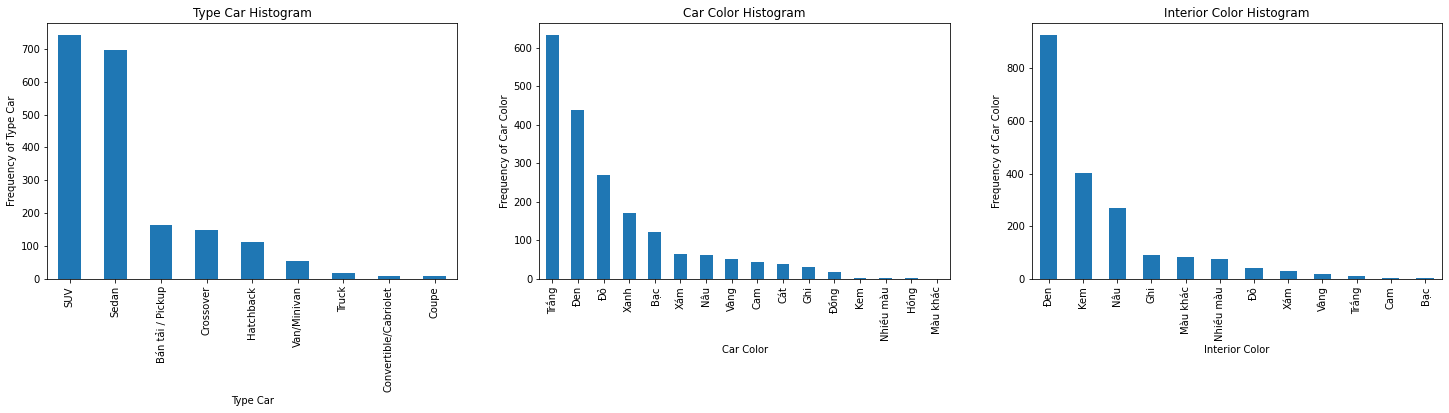

In [79]:
plt.figure(figsize=(25, 16))

plt.subplot(331)
plt1 = cars.Type.value_counts().plot( kind ='bar')
plt.title('Type Car Histogram')
plt1.set(xlabel = 'Type Car', ylabel='Frequency of Type Car')

plt.subplot(332)
plt1 = cars.CarColor.value_counts().plot(kind = 'bar')
plt.title('Car Color Histogram')
plt1.set(xlabel = 'Car Color', ylabel='Frequency of Car Color')

plt.subplot(333)
plt1 = cars.InteriorColor.value_counts().plot(kind = 'bar')
plt.title('Interior Color Histogram')
plt1.set(xlabel = 'Interior Color', ylabel='Frequency of Car Color')

plt.show()

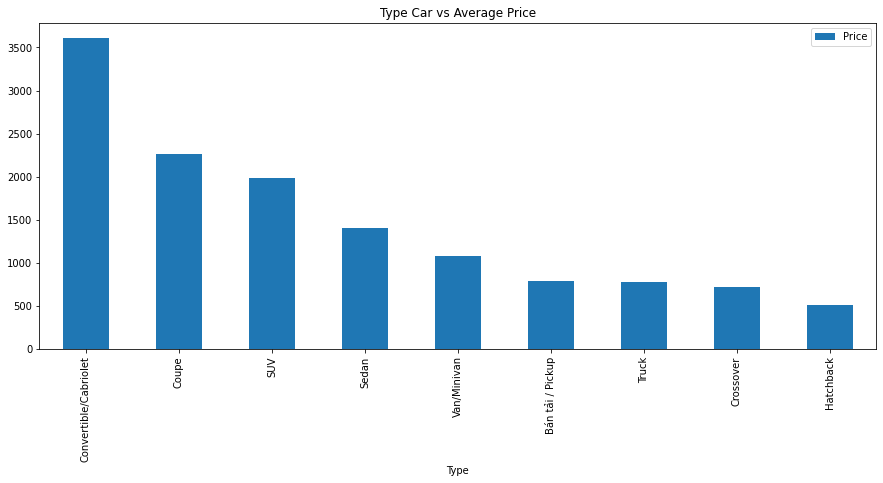

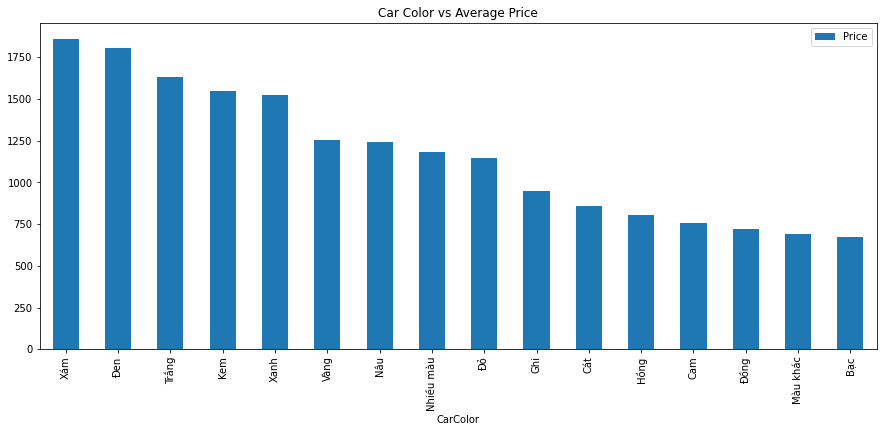

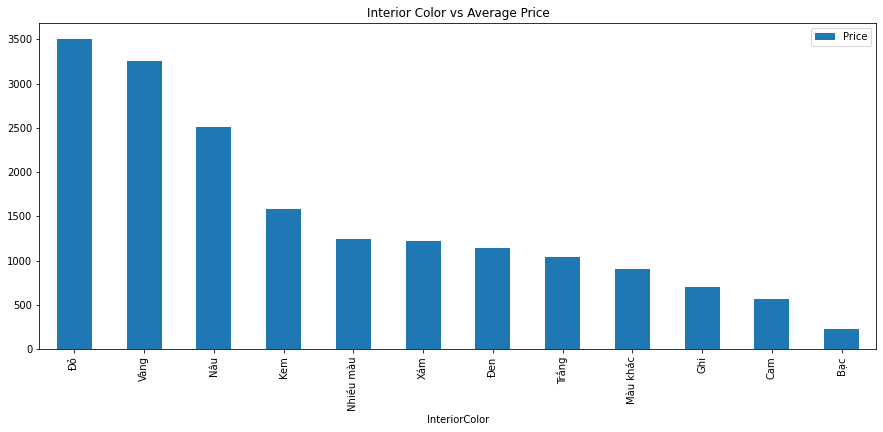

In [80]:
df = pd.DataFrame(cars.groupby(['Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Type Car vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['CarColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Car Color vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['InteriorColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Interior Color vs Average Price')
plt.show()

KL:
1. SUV là loại xe được ưa chuộng nhiều nhất.
2. Màu xe trắng là màu được đăng bán nhiều nhất, nhưng mức giá của màu ô tô xám là cao nhất.
3. Màu nội thắng màu đen được ưa chuộng nhiều nhất, nhưng mức giá của màu đỏ là cao nhất.

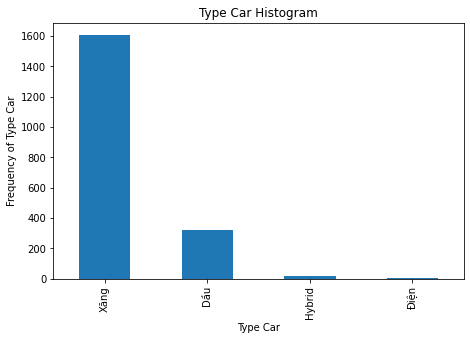

In [81]:
plt.figure(figsize=(25, 16))

plt.subplot(331)
plt1 = cars.EngineCar.value_counts().plot( kind ='bar')
plt.title('Type Car Histogram')
plt1.set(xlabel = 'Type Car', ylabel='Frequency of Type Car')

plt.show()

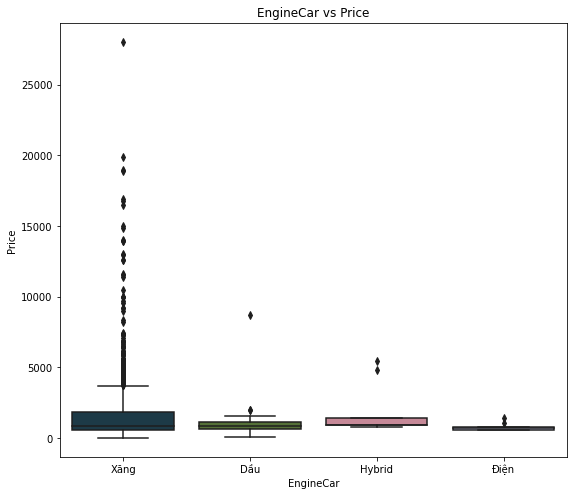

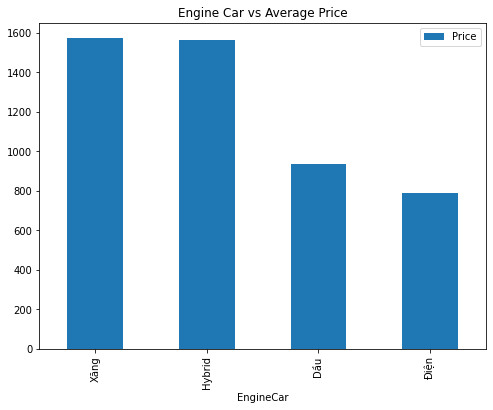

In [82]:
plt.figure(figsize=(20,8))


plt.subplot(1,2,1)
plt.title('EngineCar vs Price')
sns.boxplot(x=cars.EngineCar, y=cars.Price, palette=("cubehelix"))

df = pd.DataFrame(cars.groupby(['EngineCar'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Car vs Average Price')
plt.show()
plt.show()




 Kết luận:
- Loại xe chạy bằng nhiên liệu xăng được ưa chuộng nhiều nhất, sau đó đến dầu.
- Xe chạy bằng xăng cũng có mức giá bán cao nhất trong các loại.
- Hybrid cũng là loại nhiên liệu có mức giá cao, nên không được chuộng.
- Xe điện là loại xe mới gần đây nên có ít điều kiện thuận lợi để sử dụng (nơi tiếp nguyên liệu, sửa chửa) nên tuy là rẻ nhất nhưng ít người sử dụng.

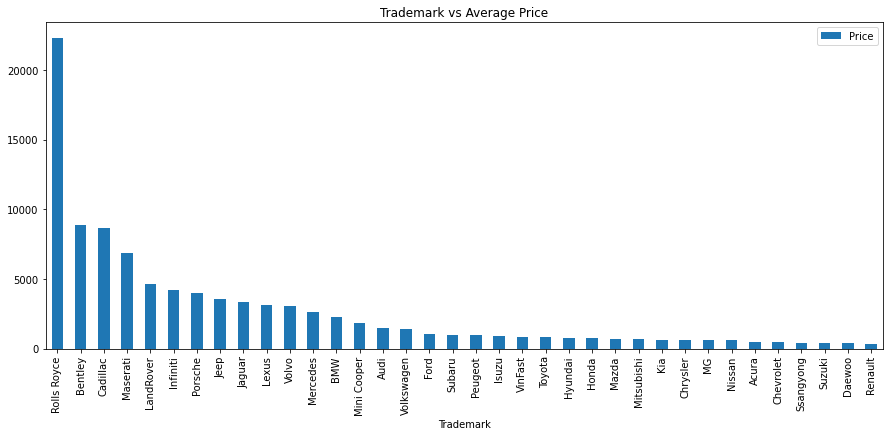

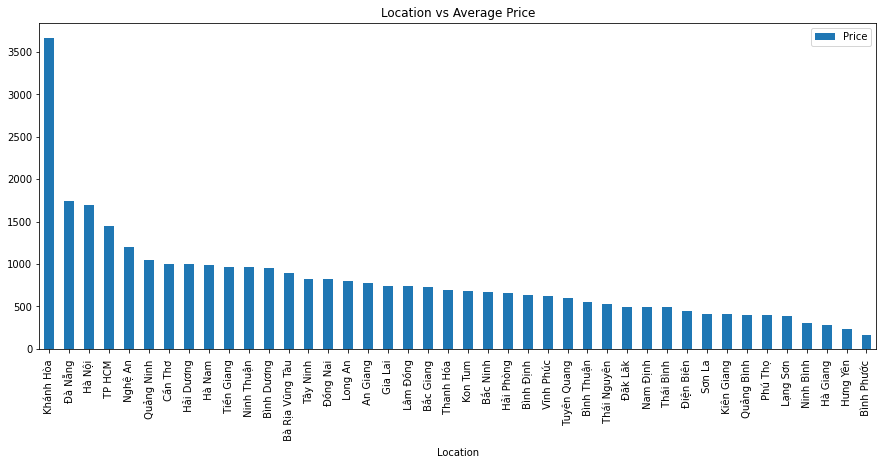

In [83]:
df = pd.DataFrame(cars.groupby(['Trademark'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))

plt.title('Trademark vs Average Price')
plt.show()


df = pd.DataFrame(cars.groupby(['Location'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Location vs Average Price')
plt.show()


Kết luận:
- Dòng xe của hãng Rolls Royce có mức giá rất cao.
- Tỉnh Khánh Hòa là nơi có mức giá bán xe cao nhất.
- Đà Nẵng - Hà Nội - HCM là 3 nơi có mức giá bán cao ngang nhau sau tỉnh Khánh Hòa. Trong khi các nơi khác mức giá không chênh lệch nhiều.

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

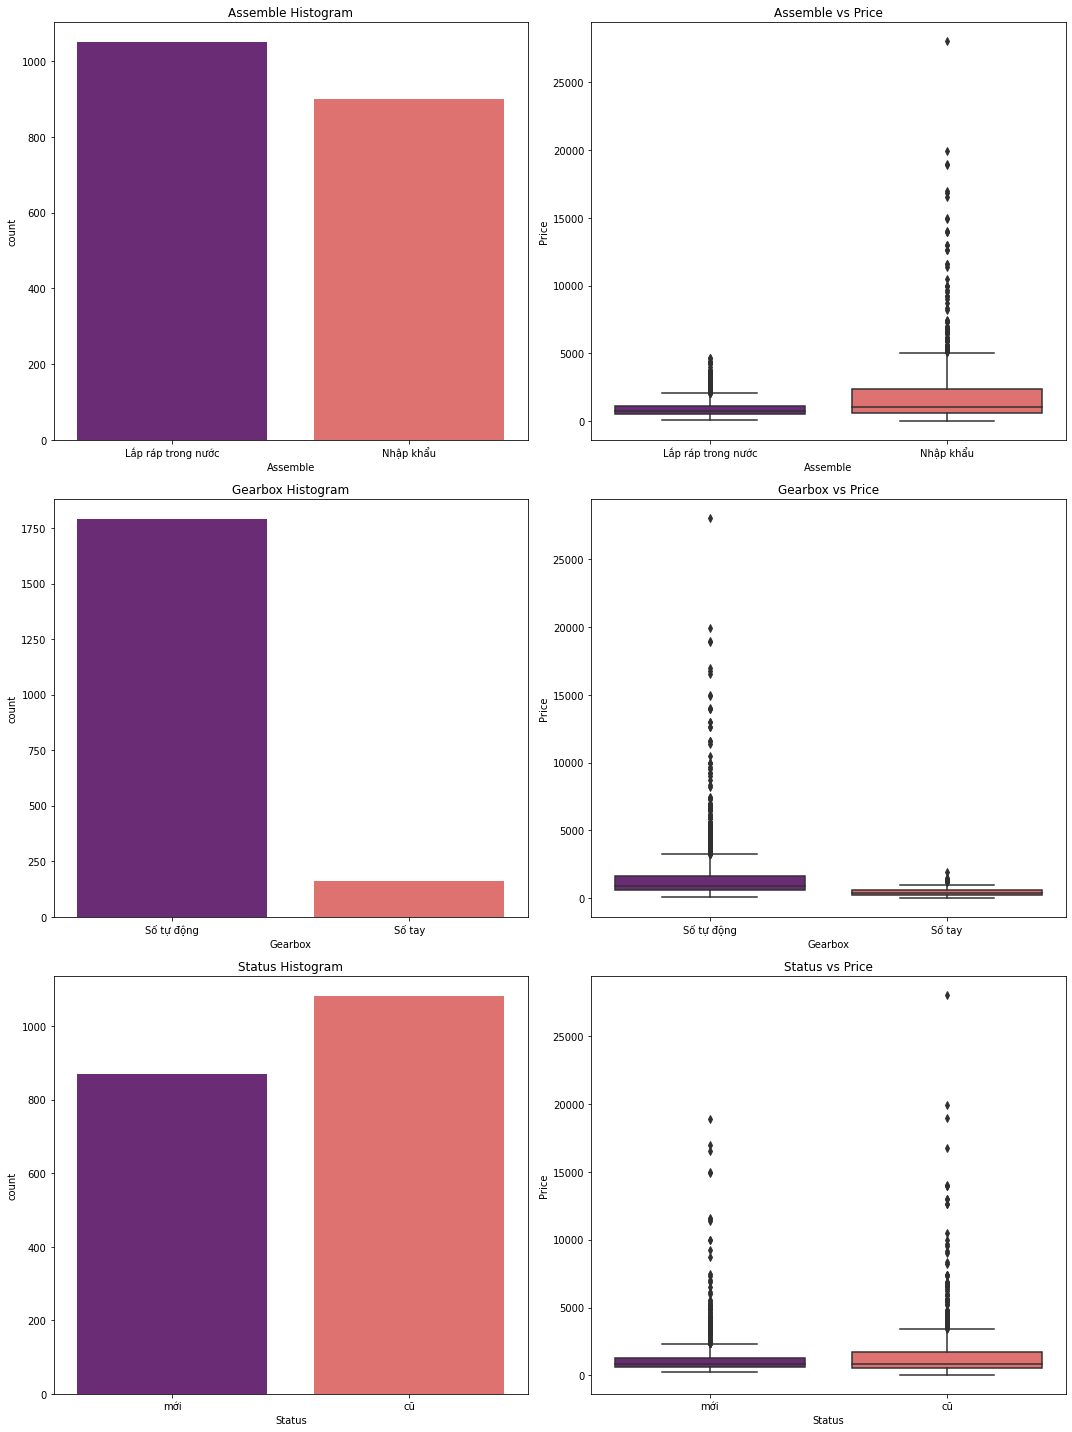

In [84]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(3,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('Assemble', 1)
plot_count('Gearbox', 3)
plot_count('Status', 5)


plt.tight_layout()

Kết luận:
- Loại xe nhập khẩu có mức giá bán cao hơn loại lắp ráp trong nước. Nên loại lắp ráp trong nước được nhiều người bán hơn.
- Tuy loại xe số tự động có giá bán cao hơn loại xe số tay nhưng được nhiều người ưa chuộng bởi sự sang trọng và tiện dụng của nó. Đặc biệt là đối với nữ.
- Loại xe mới hoặc cũ không ảnh hưởng quá nhiều tới giá xe. 
- Có thể thấy rõ không có nhiều sự khác biệt giữa 2 loại này. Dù vẫn có ngoại lệ ở loại xe cũ nhưng không đáng kể.


Numeric Data
---
- Km
- CarDoor
- CarSeat
- Capacity
- ProductionYear

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


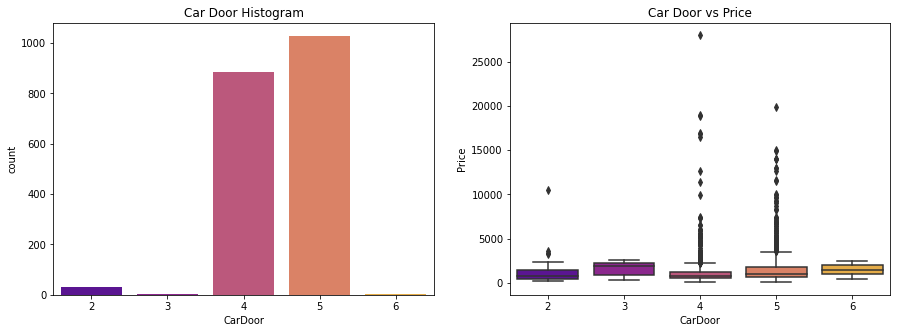

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


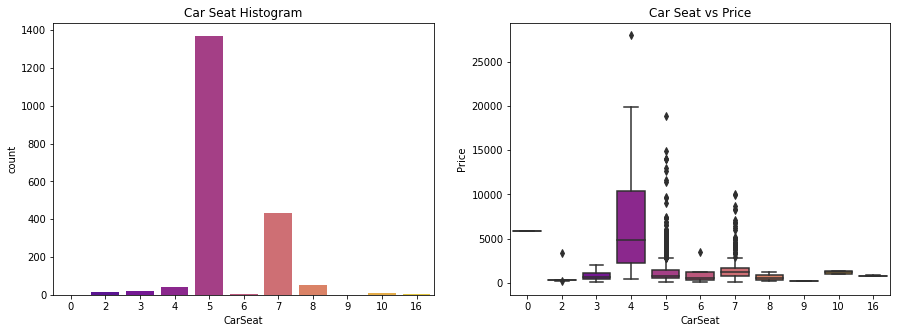

In [85]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Door Histogram')
sns.countplot(cars.CarDoor, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Door vs Price')
sns.boxplot(x=cars.CarDoor, y=cars.Price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Seat Histogram')
sns.countplot(cars.CarSeat, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Seat vs Price')
sns.boxplot(x=cars.CarSeat, y=cars.Price, palette=("plasma"))

plt.show()

Kết luận:
- Số lượng xe 4 và 5 cửa được ưa chuộng nhiều nhất. Dù loại xe 3 và 6 cửa không được chuộng nhưng có tầm giá bán cao nhất trong các loại.
- Loại chỗ 5 và 7 được ưa chuộng nhiều nhất. Tuy nhiên loại xe 4 chỗ ngồi lại có tầm giá cao nhất.

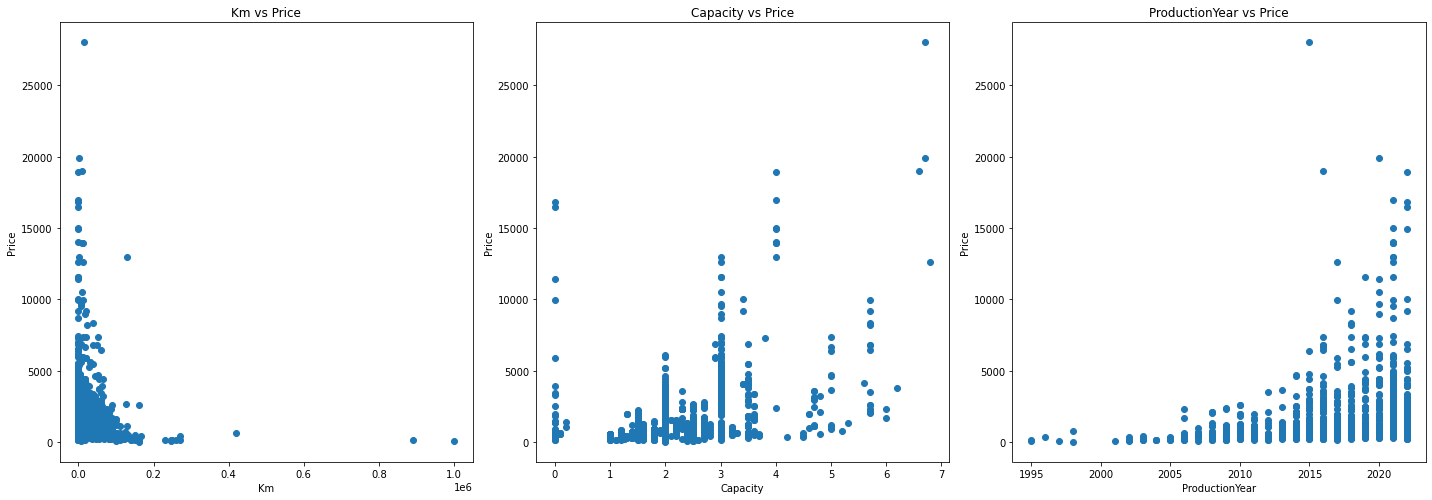

In [86]:
def scatter(x,fig):
    plt.subplot(3,3,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Km', 1)
scatter('Capacity', 2)
scatter('ProductionYear', 3)



plt.tight_layout()

Kết luận:
- Số km đã chạy của ô tô ảnh hưởng tiêu cực tới giá tiền.
- Giá xe bán qua từng năm có sự tương quan tích cực tới giá tiền, đặc biệt từ khoảng năm 2015 đến nay.
- Dung tích xăng cũng không có ý nghĩa quá nhiều tới giá tiền của 1 xe.

Các đặc trưng có ảnh hưởng tới giá tiền (Price) sau khi đã trực quan hóa dữ liệu:
---

- Km
- ProductionYear
- CarColor
- CarSeat
- CarType
- CarDoor
- EngineCar
- Gearbox
- Assemble
- Interior Color

In [87]:
cars_lr = cars[['Price','Km', 'ProductionYear','CarColor', 'CarSeat','CarDoor', 'Type',
                  'EngineCar', 'Gearbox', 'Assemble', 'InteriorColor', 'Status']]
cars_lr.head()

,Price,Km,ProductionYear,CarColor,CarSeat,CarDoor,Type,EngineCar,Gearbox,Assemble,InteriorColor,Status
0,2049,0,2022,Trắng,5,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Kem,mới
1,1989,0,2022,Trắng,7,5,SUV,Xăng,Số tự động,Nhập khẩu,Màu khác,mới
2,1083,0,2022,Xanh,7,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Đen,mới
3,925,0,2022,Đỏ,5,5,Crossover,Xăng,Số tự động,Lắp ráp trong nước,Đen,mới
4,2879,0,2021,Đen,5,4,Sedan,Xăng,Số tự động,Lắp ráp trong nước,Đen,cũ


In [88]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_outlier

cars_lr = dummies('CarColor',cars_lr)
cars_lr = dummies('Type',cars_lr)
cars_lr = dummies('EngineCar',cars_lr)
cars_lr = dummies('Gearbox',cars_lr)
cars_lr = dummies('Assemble',cars_lr)
cars_lr = dummies('InteriorColor',cars_lr)
cars_lr = dummies('Status',cars_lr)


In [89]:
cars_lr.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,Cam,Cát,Ghi,Hồng,Kem,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
0,2049,0,2022,5,5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1989,0,2022,7,5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1083,0,2022,7,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,925,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2879,0,2021,5,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Price                  1950 non-null   int64
 1   Km                     1950 non-null   int64
 2   ProductionYear         1950 non-null   int64
 3   CarSeat                1950 non-null   int64
 4   CarDoor                1950 non-null   int64
 5   Cam                    1950 non-null   uint8
 6   Cát                    1950 non-null   uint8
 7   Ghi                    1950 non-null   uint8
 8   Hồng                   1950 non-null   uint8
 9   Kem                    1950 non-null   uint8
 10  Màu khác               1950 non-null   uint8
 11  Nhiều màu              1950 non-null   uint8
 12  Nâu                    1950 non-null   uint8
 13  Trắng                  1950 non-null   uint8
 14  Vàng                   1950 non-null   uint8
 15  Xanh                   1950 non-null  

In [91]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars_lr,  train_size = 0.8, test_size = 0.2)

In [92]:
# df_train = pd.get_dummies(df_train)
df_train.shape
df_train.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,Cam,Cát,Ghi,Hồng,Kem,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
751,570,40000,2018,7,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
250,1888,30000,2017,5,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
699,1190,69000,2010,5,5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1234,808,0,2022,5,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1384,400,0,1996,7,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
df_test.shape
df_test.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,Cam,Cát,Ghi,Hồng,Kem,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
706,869,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
639,1590,45000,2017,5,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1902,389,0,2021,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1314,730,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1168,4450,15000,2021,5,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Outlier Handling


### Khảo sát

<AxesSubplot:>

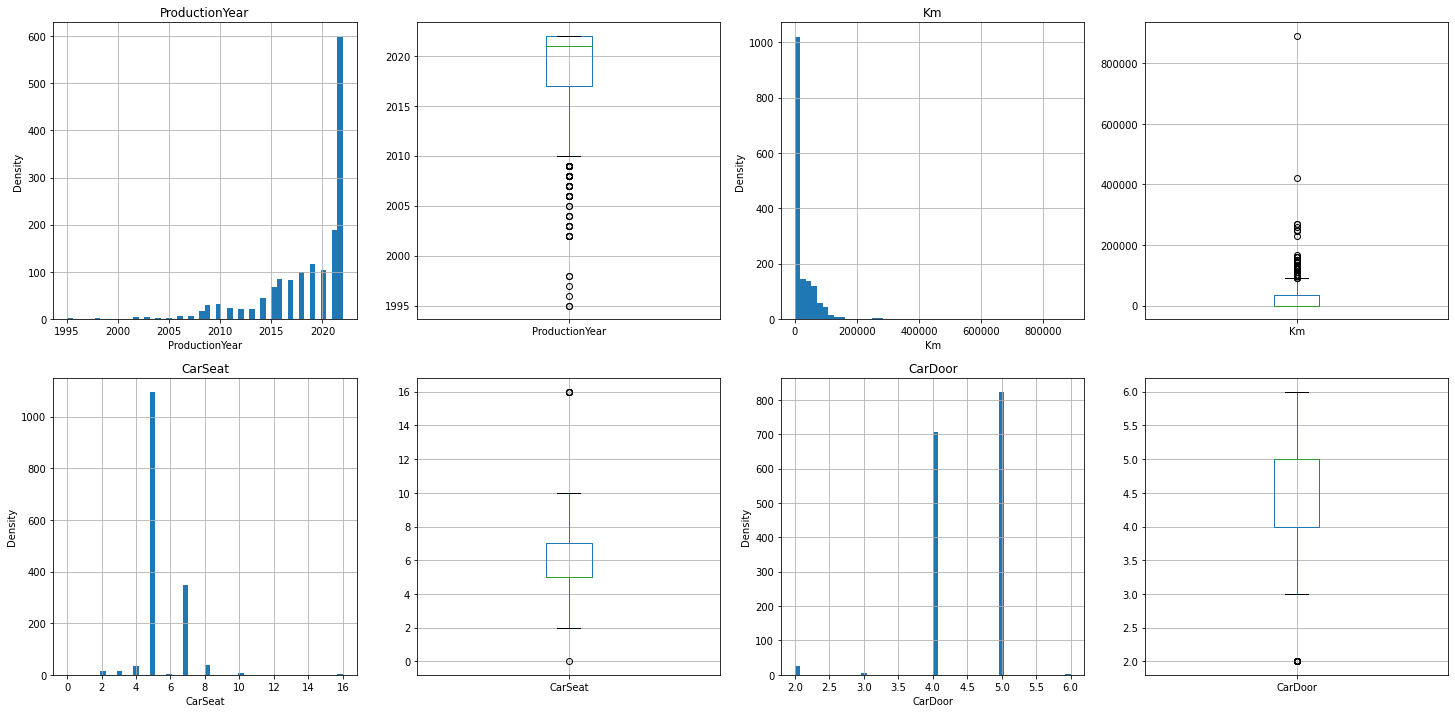

In [94]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=df_train.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure=df_train.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="Km")

plt.subplot(2,4,5)
figure=df_train.CarSeat.hist(bins=50)
figure.set_title('CarSeat')
figure.set_xlabel('CarSeat')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="CarSeat")

plt.subplot(2,4,7)
figure=df_train.CarDoor.hist(bins=50)
figure.set_title('CarDoor')
figure.set_xlabel('CarDoor')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="CarDoor")



Kết luận:
- Có thể thấy đặc trưng ProductionYear có nhiều giá trị ngoại lệ lệch dưới và đặc trưng Km cũng có nhiều giá trị ngoại lệ lệch trên.
- Trong khi đó đặc trưng CarSeat và CarDoor không có nhiều giá trị ngoại lệ.

=> Nên ta xử lý ngoại lệ cho 2 đặc trưng ProductionYear và Km.


### Áp dụng xử lý ngoại lệ

In [95]:
cars_outlier = df_train.copy()

#Km
IQR = cars_outlier.Km.quantile(0.75)-cars_outlier.Km.quantile(0.25)
# lower_bridge=cars_outlier['Km'].quantile(0.25)-(IQR*3)
upper_bridge = cars_outlier['Km'].quantile(0.75)+(IQR*3)

cars_outlier.loc[cars_outlier['Km'] >= round(upper_bridge), 'Km'] = round(upper_bridge)

#ProductionYear
IQR = cars_outlier.ProductionYear.quantile(0.75) - cars_outlier.ProductionYear.quantile(0.25)
lower_bridge = cars_outlier['ProductionYear'].quantile(0.25)-(IQR*3)
cars_outlier.loc[cars_outlier['ProductionYear'] < round(lower_bridge), 'ProductionYear'] = round(lower_bridge)


### Kết quả xử lý ngoại lệ

<AxesSubplot:>

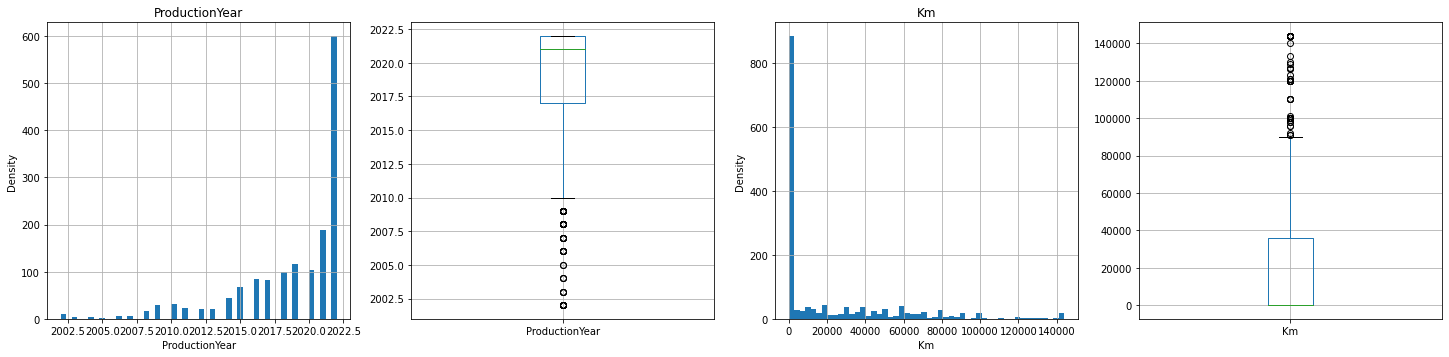

In [96]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=cars_outlier.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
cars_outlier.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure=cars_outlier.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
cars_outlier.boxplot(column="Km")

-> Một số giá trị lệch quá cao và quá thấp đã được xử lý, mặc dù vẫn còn nhiều giá trị nằm ngoài mức phân bố.

In [97]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaler(df):
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    return df_scaled

In [98]:
cars_scaler = min_max_scaler(cars_outlier)

# Chuẩn hóa dữ liệu

**Robust Scaler**

In [ ]:
def robust(df):
    ### dùng RobustScaler from sklearn library
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    return df_scaled

In [ ]:
cars_scaler = robust(cars_outlier)

In [ ]:
cars_scaler = min_max_scaler(cars_outlier)

# Xây dựng Model (RandomForestRegressor)

In [99]:
X_train = cars_scaler.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (1560, 45)
X_test: (390, 45)


In [100]:
y_train = X_train.pop("Price")
y_test = X_test.pop("Price")

In [101]:
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (1560,)
y_test: (390,)


In [102]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [103]:
predictions = model_RD.predict(X_test)

In [111]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2590.077880609913

In [107]:
from sklearn.metrics import r2_score 
model_RD.score(X_test,y_test)

-0.5072807549738692

In [472]:
from sklearn.metrics import r2_score 
r2_score(y_test,predictions)

-0.44131798608081363

Siêu tham số

In [475]:
# from ensurepip import bootstrap
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'bootstrap' : [True, False]
}
bootstrap = ['True', 'False']
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [476]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid,
                           cv=10, n_jobs=-1, verbose=2)
# Fit the grid search to the data
grid_fit = grid_search.fit(cars_outlier, y_train)
best_parameters = grid_fit.best_params_
best_parameters

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

Sau siêu tham số

In [119]:
model_RD = RandomForestRegressor(random_state=123, n_estimators=100, bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8)
model_RD.fit(X_train, y_train)
predictions = model_RD.predict(df_test)

In [486]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))


3053.1464094413413

In [113]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 0.06995349221231617
Fold: 1 : rmse = 0.05292984691045663
Fold: 2 : rmse = 0.04396417739308705
Fold: 3 : rmse = 0.08411338355406042
Fold: 4 : rmse = 0.03969580660561437
Fold: 5 : rmse = 0.07484383111952168
Fold: 6 : rmse = 0.05344855355090437
Fold: 7 : rmse = 0.04923684232780494
Fold: 8 : rmse = 0.06666119344546702
Fold: 9 : rmse = 0.03924307256878959


Cross-Validation:
 mean 0.057409019968802225 
 std: 0.014788909052634797


LinearRegression

In [114]:
from sklearn.linear_model import LinearRegression


model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [115]:
predictions = model_LR.predict(X_test)

In [118]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))

3539.236202212944

In [117]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_LR.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_LR.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 0.0721357851853279
Fold: 1 : rmse = 0.053343220139569186
Fold: 2 : rmse = 0.04535205188812855
Fold: 3 : rmse = 110327283604.80928
Fold: 4 : rmse = 0.04094848441114174
Fold: 5 : rmse = 0.07652343239940822
Fold: 6 : rmse = 0.055198663998203966
Fold: 7 : rmse = 0.05198919375997085
Fold: 8 : rmse = 0.0673780954256687
Fold: 9 : rmse = 0.042736097448168385


Cross-Validation:
 mean 11032728360.531488 
 std: 33098185081.42593
